In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.pyplot as plt




In [2]:
x_min = -10
x_max = 10
y_min = -10
y_max = 10
nx = 512
ny = 512

def potential(x, y):
   
    return 3 * y * (y >= -8) + 40 * (y < -8)


def init_wavefunction(x, y, sigma_x = 0.5, sigma_y = 0.5, k_x = 5.0, k_y = 0.0, x0 = -5.0, y0 = 0):
    norm = 1.0/np.sqrt(sigma_x*sigma_y*np.pi)
    return np.exp(-(x-x0)**2/(2*sigma_x) - (y-y0)**2/(2*sigma_y) + 1j*k_x*x + 1j*k_y*y) * norm

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_initial_condition(lambda x, y: init_wavefunction(x, y))
sim.set_mass(10.0)
sim.set_potential(lambda x, y: potential(x,y))
sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
sim.set_time_parameters(0.0, 20.0, 8000)
sim.prepare()






ic

|

message

:

'

Dimension set to 2

'

ic

|

message

:

'

Initial condition set.

'

ic

|

self

.

initial_psi_fun

:

<

function

<

lambda

>

at

0x1390d48b0

>

ic

|

'

Time grid:

'

ic

|

self

.

t0

:

0.0

,

self

.

t1

:

20.0

,

self

.

n_steps

:

8000

ic

|

hasattr

(

self

,

'

gs

'

)

:

False

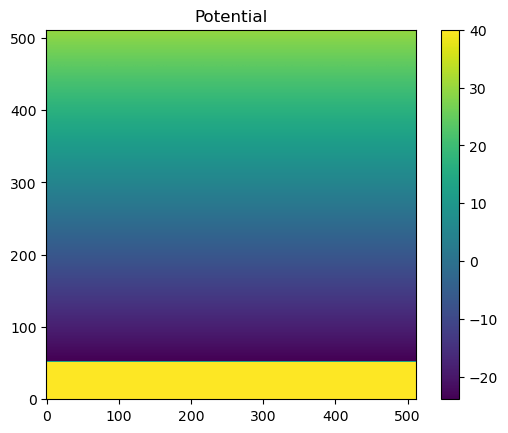

In [4]:
plt.figure()
plt.imshow(sim.ham.V.T, origin='lower')
plt.title('Potential')
plt.colorbar()
plt.show()

In [5]:
anim1 = Animator2d(sim, folder='./frames1/')
anim1.set_style(DarkTheme())
anim1.vis_type = 'complex'
anim1.show_axis = False


anim2 = Animator2d(sim, folder='./frames2/')
anim2.set_style(DarkTheme())
anim2.vis_type = 'magnitude'
anim2.show_axis = False

anim1.set_interval(10)
anim1.set_framesize(1024, 1024)
anim2.set_interval(10)
anim2.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()
anim1.add_potential_visualization_2d(transparent_range=[-50,39])
anim2.init_figure()
anim2.add_potential_visualization_2d(transparent_range=[-50,39])


anim_callback1 = anim1.get_callback()
anim_callback2 = anim2.get_callback()

def callback(sim):
    anim_callback1(sim)
    anim_callback2(sim)
    
sim.simulate(callback=callback)
anim1.make_movie("gravity.mp4")
anim1.clean_frames()
anim2.make_movie("gravity_magnitude.mp4")
anim2.clean_frames()

ic

|

self

.

format

:

'

./frames1/frame

%05d

.png

'

ic

|

self

.

format

:

'

./frames2/frame

%05d

.png

'

ic

|

'

inside mpl_style

'

ic

|

self

.

caption_font

:

<

matplotlib

.

font_manager

.

FontProperties

object

at

0x13922df00

>

ic

|

'

inside mpl_style

'

ic

|

self

.

caption_font

:

<

matplotlib

.

font_manager

.

FontProperties

object

at

0x139515360

>

ic

|

'

Running simulation...

'

  0%|          | 0/8000 [00:00<?, ?it/s]

ic

|

len

(

self

.

frame_list

)

:

801

ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-conf

[out#0/mp4 @ 0x7ff611006ac0] video:857kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.194179%
frame=  801 fps=222 q=-1.0 Lsize=     868kB time=00:00:33.25 bitrate= 213.8kbits/s speed=9.19x    
[libx264 @ 0x7ff6110107c0] frame I:4     Avg QP: 9.88  size: 20925
[libx264 @ 0x7ff6110107c0] frame P:204   Avg QP:22.63  size:  3170
[libx264 @ 0x7ff6110107c0] frame B:593   Avg QP:25.88  size:   248
[libx264 @ 0x7ff6110107c0] consecutive B-frames:  1.1%  0.5%  0.0% 98.4%
[libx264 @ 0x7ff6110107c0] mb I  I16..4: 65.7% 32.5%  1.8%
[libx264 @ 0x7ff6110107c0] mb P  I16..4:  0.4%  0.4%  0.0%  P16..4:  8.1%  2.3%  1.3%  0.0%  0.0%    skip:87.5%
[libx264 @ 0x7ff6110107c0] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  2.9%  0.1%  0.0%  direct: 0.0%  skip:97.0%  L0:47.0% L1:47.6% BI: 5.4%
[libx264 @ 0x7ff6110107c0] 8x8 transform intra:36.2% inter:69.9%
[libx264 @ 0x7ff6110107c0] coded y,uvDC,uvAC intra: 15.3% 21.0% 14.6% inter: 1.3% 1.8% 0.2%
[libx264 @ 0x7ff6110107c0] i16 

|

len

(

self

.

frame_list

)

:

801

ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-conf

[out#0/mp4 @ 0x7fa2f6707400] video:355kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.884136%
frame=  801 fps=233 q=-1.0 Lsize=     365kB time=00:00:33.25 bitrate=  89.9kbits/s speed=9.66x    
[libx264 @ 0x7fa2f6711340] frame I:4     Avg QP: 9.69  size:  2923
[libx264 @ 0x7fa2f6711340] frame P:202   Avg QP:22.88  size:   873
[libx264 @ 0x7fa2f6711340] frame B:595   Avg QP:29.72  size:   293
[libx264 @ 0x7fa2f6711340] consecutive B-frames:  0.9%  0.2%  0.0% 98.9%
[libx264 @ 0x7fa2f6711340] mb I  I16..4: 66.1% 33.0%  0.8%
[libx264 @ 0x7fa2f6711340] mb P  I16..4:  1.7%  1.0%  0.1%  P16..4:  5.3%  0.4%  0.1%  0.0%  0.0%    skip:91.4%
[libx264 @ 0x7fa2f6711340] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  3.9%  0.1%  0.0%  direct: 0.0%  skip:95.9%  L0:51.6% L1:47.1% BI: 1.2%
[libx264 @ 0x7fa2f6711340] 8x8 transform intra:34.1% inter:70.6%
[libx264 @ 0x7fa2f6711340] coded y,uvDC,uvAC intra: 7.7% 0.0% 0.0% inter: 0.1% 0.0% 0.0%
[libx264 @ 0x7fa2f6711340] i16 v,h